# Processing data

1. Packages and functions 
2. Process data
  1. count missing data
  2. resample data
  3. find statistics of data
  4. fill missing values
  5. other analysis 

# Import necessary packages

In [ ]:
import pandas as pd
import numpy as np

# Let's import our Osogbo data

In [ ]:
url  = 'https://github.com/ogunjosam/CARNASRDA_python_training/raw/main/osogbo.csv'

# we select column and set index columns
xx = pd.read_csv(url,index_col='created_at',usecols=[0,2,3,4,7,8])
xx

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%
created_at,,,,,
2021-01-01 00:01:14 UTC,48.24,72.73,83.95,78.0,59.0
2021-01-01 00:03:14 UTC,48.18,72.32,81.34,78.0,59.0
2021-01-01 00:05:14 UTC,48.95,74.23,83.46,78.0,59.0
2021-01-01 00:07:14 UTC,47.47,73.09,82.78,78.0,59.0
2021-01-01 00:09:14 UTC,48.09,72.57,82.44,78.0,58.0
...,...,...,...,...,...
2021-12-31 23:50:51 UTC,52.54,70.86,88.53,82.0,55.0
2021-12-31 23:52:51 UTC,53.40,72.86,90.23,82.0,55.0
2021-12-31 23:54:51 UTC,51.96,70.60,87.96,82.0,55.0


# Get summary statistics

In [ ]:
xx.describe()

# count the missing data

xx.isnull().sum(axis=0)

PM1.0_CF1_ug/m3     0
PM2.5_CF1_ug/m3     0
PM10.0_CF1_ug/m3    0
Temperature_F       0
Humidity_%          0
dtype: int64

# Get a picture of the data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f312303d110>,
      dtype=object)

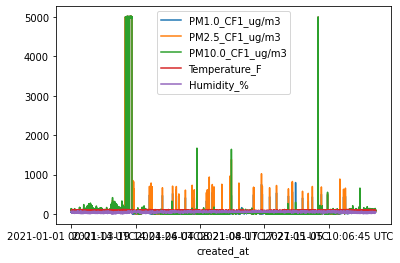

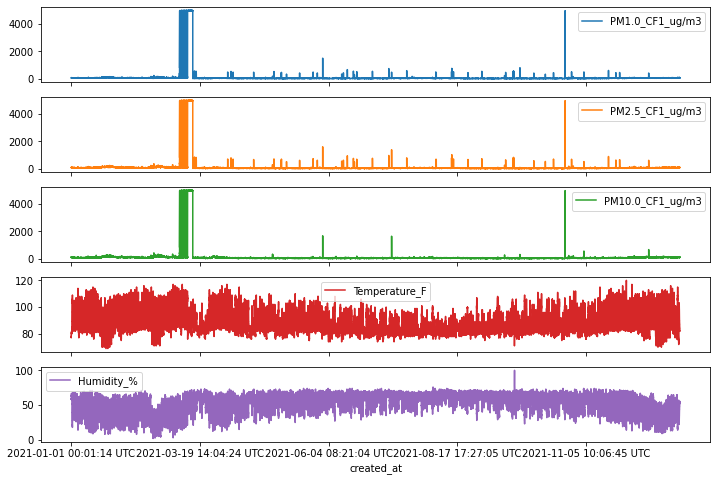

In [ ]:
xx.plot()
# This plots all the data into one figure, let's break it down

xx.plot(subplots=True,figsize=(12,8))

# Remove outliers

Pollution data have outliers, let remove them

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f311c045750>,
      dtype=object)

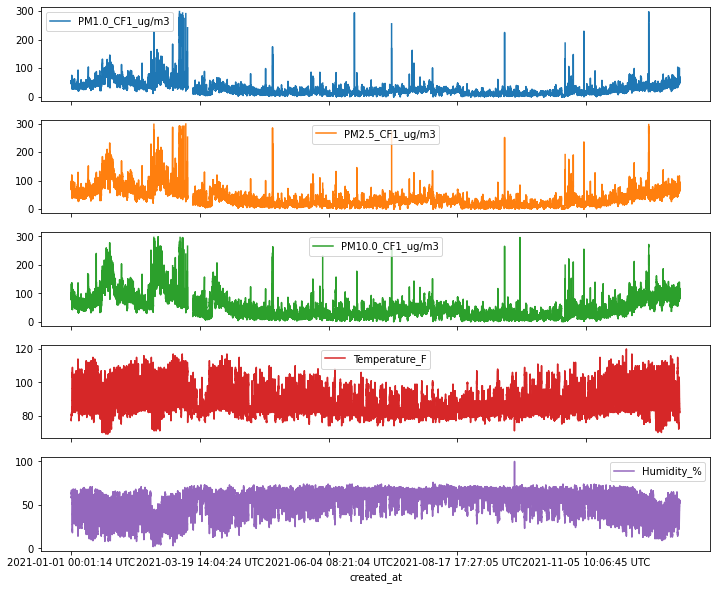

In [ ]:
# to get column list
list(xx)

# we can remove the outliers one after the other
# try xx[xx['PM1.0_CF1_ug/m3'] > 300] = np.nan 
xx['PM1.0_CF1_ug/m3'][xx['PM1.0_CF1_ug/m3'] > 300] = np.nan 
xx['PM2.5_CF1_ug/m3'][xx['PM2.5_CF1_ug/m3'] > 300] = np.nan 
xx['PM10.0_CF1_ug/m3'][xx['PM10.0_CF1_ug/m3'] > 300] = np.nan 
xx.plot(subplots=True,figsize=(12,10))

# Resample data

We want to have different sampling time.  Instead of 2 mins data can we get hourly, daily and monthly data?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f310f170610>,
      dtype=object)

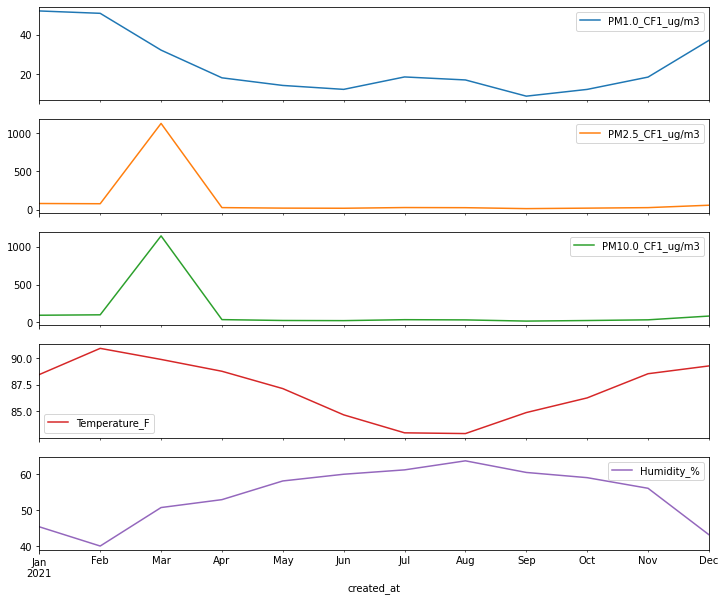

In [ ]:
xy = xx.resample('H').mean()

# this gives error

url  = 'https://github.com/ogunjosam/CARNASRDA_python_training/raw/main/osogbo.csv'

# we select column and set index columns
xx = pd.read_csv(url,index_col='created_at',usecols=[0,2,3,4,7,8],parse_dates=True)
xx['PM1.0_CF1_ug/m3'][xx['PM1.0_CF1_ug/m3'] > 300] = np.nan
xx
xy = xx.resample('M').mean()
xy.plot(subplots=True,figsize=(12,10))

# Convert a column

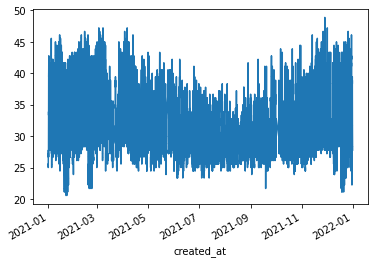

In [ ]:
list(xx)

xx['Temperature_F'] = (xx['Temperature_F']-32)*(5/9)
xx['Temperature_F'].plot()

# Interpolate missing data

In [ ]:
xx.interpolate(method='nearest')  # ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%
created_at,,,,,
2021-01-01 00:01:14+00:00,48.24,72.73,83.95,78.0,59.0
2021-01-01 00:03:14+00:00,48.18,72.32,81.34,78.0,59.0
2021-01-01 00:05:14+00:00,48.95,74.23,83.46,78.0,59.0
2021-01-01 00:07:14+00:00,47.47,73.09,82.78,78.0,59.0
2021-01-01 00:09:14+00:00,48.09,72.57,82.44,78.0,58.0
...,...,...,...,...,...
2021-12-31 23:50:51+00:00,52.54,70.86,88.53,82.0,55.0
2021-12-31 23:52:51+00:00,53.40,72.86,90.23,82.0,55.0
2021-12-31 23:54:51+00:00,51.96,70.60,87.96,82.0,55.0
